# Illustration of MOM algorithms

 # Library import

In [1]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import time
import sys,os
%matplotlib inline

## Toy database generation

### Generation of the two Gaussian blobs.

In [2]:
np.random.seed(41)
centers = [-np.ones(2), np.ones(2)]

X, y = make_blobs(n_samples=600, n_features=2, cluster_std=1.4,
                  centers=centers, shuffle=True)

Xtest, ytest = make_blobs(n_samples=500, n_features=2, cluster_std=1.4,
                  centers=centers, shuffle=True)


### Outlier generation
We add outliers to the database designed in order to be hard to learn with common linear classification algorithms.

In [3]:
for f in range(30):
    ind=int(np.floor(np.random.rand()*len(X)))
    X=np.vstack([X[:ind],(0.1*(np.random.randn(2))+np.array([24,8])).reshape(1,2),X[ind:]])
    y=np.hstack([y[:ind],[0],y[ind:]])

### Plot of the database

In [4]:
col = []
for ele in y:
    if ele == 0:
        col.append('r')
    else:
        col.append('y')

/home/mathieu/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


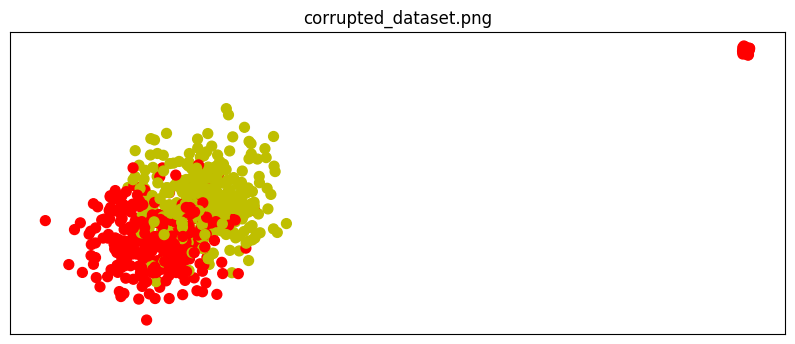

In [5]:
fig=plt.figure(figsize=(10, 4), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(X[:,0],X[:,1], s=50*np.ones(630), c=col)
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
title = 'corrupted_dataset.png'
plt.title(title)
plt.show()

## Algorithms definition and parameters.

### ERM algorithms

In [6]:
from sklearn.linear_model import Perceptron
per=Perceptron()
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression()
from sklearn.svm import SVC
svm=SVC(kernel='linear')

### MOM algorithms

In [23]:
from linear_model import perceptronMOM, logregMOM
from kernel_model import log_kernel_MOM,log_kernel_MOM_fast
# Parameters Perceptron MOM :  block size K, step-size parameter 
# eta_0, number of epoch T.
perMOM=perceptronMOM(71,0.01,200)
# Parameters Logistic regression MOM : block size K, step-size parameter 
# eta_0, regularization parameter \beta, number of epoch T.
lrMOM=logregMOM(71,0.1,0.01,100)
# Parameters KLR MOM :  block size K, step-size parameter 
# eta_0, regularization parameter \beta, number of epoch T, type of kernel (could be RBF,polynomial) 
# and degree for polynomial kernel.
lrkMOM=log_kernel_MOM(71,10,0.1,200,kernel='poly',degree=1)

## Comparison of ERM and MOM algorithms

Plot function: 

In [24]:
def plot_classif(clfs, limPlot, title, shape):
    for i in range(len(clfs)):
        clf=clfs[i]
        plt.subplot(shape[0],shape[1],i+1)
        clf.fit(X,y)
        pred=clf.predict(Xtest)
        xx, yy = np.meshgrid(np.arange(limPlot[0][0], limPlot[0][1], 0.1), np.arange(limPlot[1][0], limPlot[1][1], 0.1))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
        #plt.scatter(Xtest[:,0],Xtest[:,1], s= 100*np.ones(len(ytest)), c=col)
        plt.scatter(X[:,0],X[:,1], s=50*np.ones(630), c=col)
        plt.xticks([])
        plt.yticks([])
        plt.title(title[i]+': '+str(np.mean(ytest==pred)))

Plot for the different linear algorithms

/home/mathieu/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/mathieu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


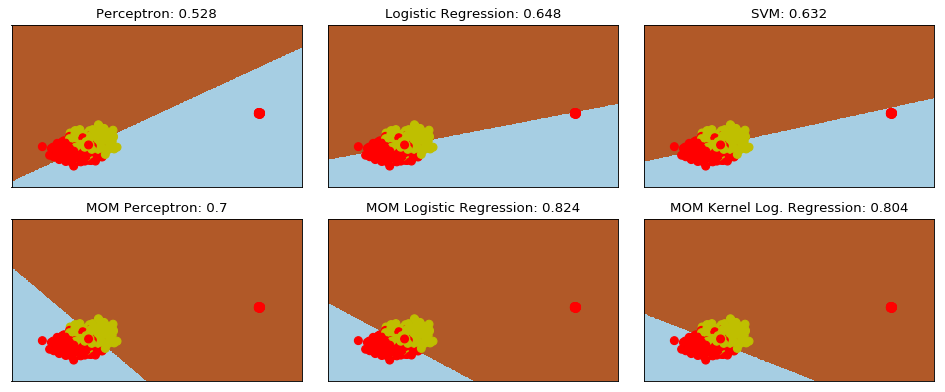

In [28]:
fig=plt.figure(figsize=(12, 5), dpi= 80, facecolor='w', edgecolor='k')
classifiers=[per,logreg,svm,perMOM,lrMOM,lrkMOM]
titles=['Perceptron','Logistic Regression','SVM','MOM Perceptron','MOM Logistic Regression','MOM Kernel Log. Regression']
plot_classif(classifiers,[[-10,30],[-10,30]],titles,[2,3])
plt.tight_layout()
plt.show()